In [245]:
import pandas as pd
import numpy as np
data = pd.read_excel("/Users/sahana/Data Sets For Fire Risk App.xlsx")

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import bz2,pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

In [247]:
data

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire
0,1,6,30,60,68,0.0,not fire
1,2,6,31,79,43,0.0,fire
2,3,6,29,95,43,0.0,fire
3,4,6,32,83,78,0.0,fire
4,5,6,28,64,48,16.8,not fire
...,...,...,...,...,...,...,...
248,6,1,34,150,73,13.2,fire
249,7,1,25,140,64,11.2,fire
250,8,1,30,159,43,10.1,fire
251,9,1,31,104,49,9.3,fire


In [248]:


df = data.copy()
df.head()

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire
0,1,6,30,60,68,0.0,not fire
1,2,6,31,79,43,0.0,fire
2,3,6,29,95,43,0.0,fire
3,4,6,32,83,78,0.0,fire
4,5,6,28,64,48,16.8,not fire


In [249]:

df.tail()

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire
248,6,1,34,150,73,13.2,fire
249,7,1,25,140,64,11.2,fire
250,8,1,30,159,43,10.1,fire
251,9,1,31,104,49,9.3,fire
252,10,1,29,105,34,0.2,fire


In [250]:

df.isnull().sum()

day                       0
month                     0
Temperature in Celsius    0
Wind Speed in kph         0
RH                        0
Rain                      0
Fire or Not Fire          0
dtype: int64

In [251]:

df[df.isnull().any(axis=1)]

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire


In [252]:
df.columns

Index(['day', 'month', 'Temperature in Celsius', 'Wind Speed in kph', 'RH',
       'Rain', 'Fire or Not Fire'],
      dtype='object')

In [253]:
encoder = LabelEncoder()
df['Fire or Not Fire'] = encoder.fit_transform(df['Fire or Not Fire'])

df.head()

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire
0,1,6,30,60,68,0.0,1
1,2,6,31,79,43,0.0,0
2,3,6,29,95,43,0.0,0
3,4,6,32,83,78,0.0,0
4,5,6,28,64,48,16.8,1


In [254]:

df.corr()

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire
day,1.000000,0.170139,-0.057401,-0.144613,-0.020588,0.044652,0.073705
month,0.170139,1.000000,0.074868,-0.364628,0.176898,-0.164243,0.281776
Temperature in Celsius,-0.057401,0.074868,1.000000,-0.013101,0.075308,0.003053,-0.039892
Wind Speed in kph,-0.144613,-0.364628,-0.013101,1.000000,-0.100981,0.219464,-0.156766
RH,-0.020588,0.176898,0.075308,-0.100981,1.000000,-0.069298,0.103818
Rain,0.044652,-0.164243,0.003053,0.219464,-0.069298,1.000000,0.154123
Fire or Not Fire,0.073705,0.281776,-0.039892,-0.156766,0.103818,0.154123,1.000000


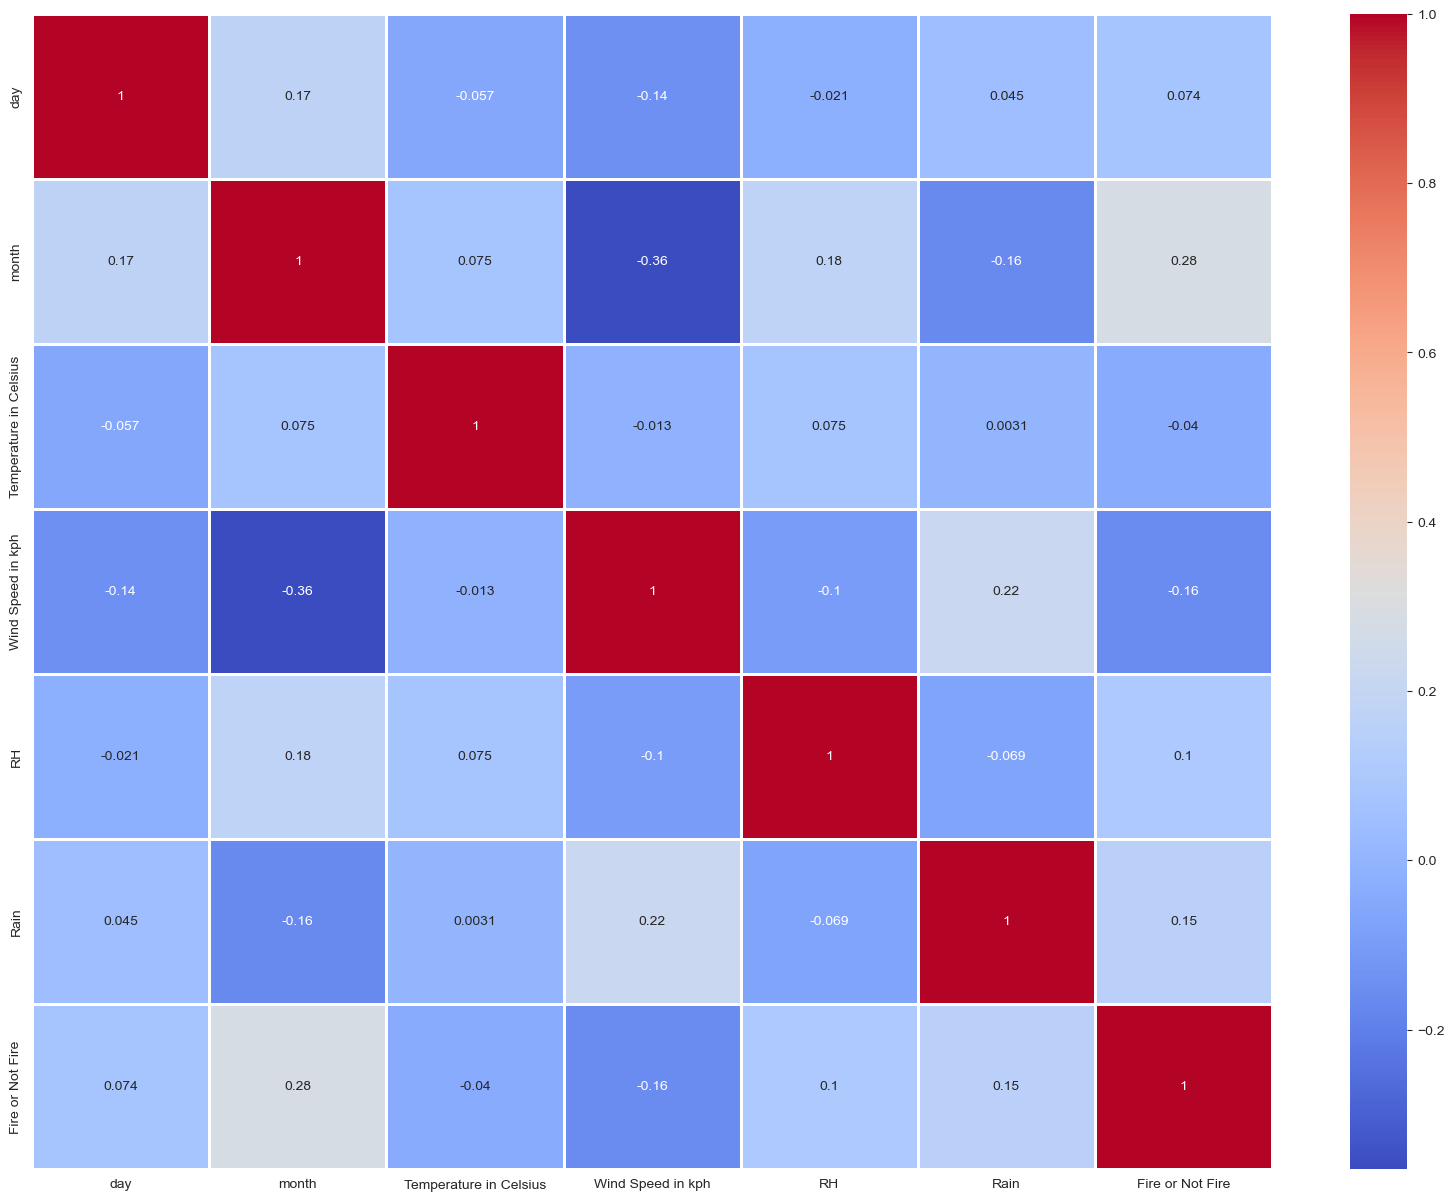

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(
    df.corr(), 
    annot=True, 
    linewidths=1, 
    linecolor="white", 
    cbar=True, 
    cmap="coolwarm",  # Use a diverging colormap
    xticklabels=True,  # Set xticklabels explicitly
    yticklabels=True   # Set yticklabels explicitly
)
plt.show()

     

In [256]:
df["Fire or Not Fire"].value_counts()

Fire or Not Fire
1    177
0     76
Name: count, dtype: int64

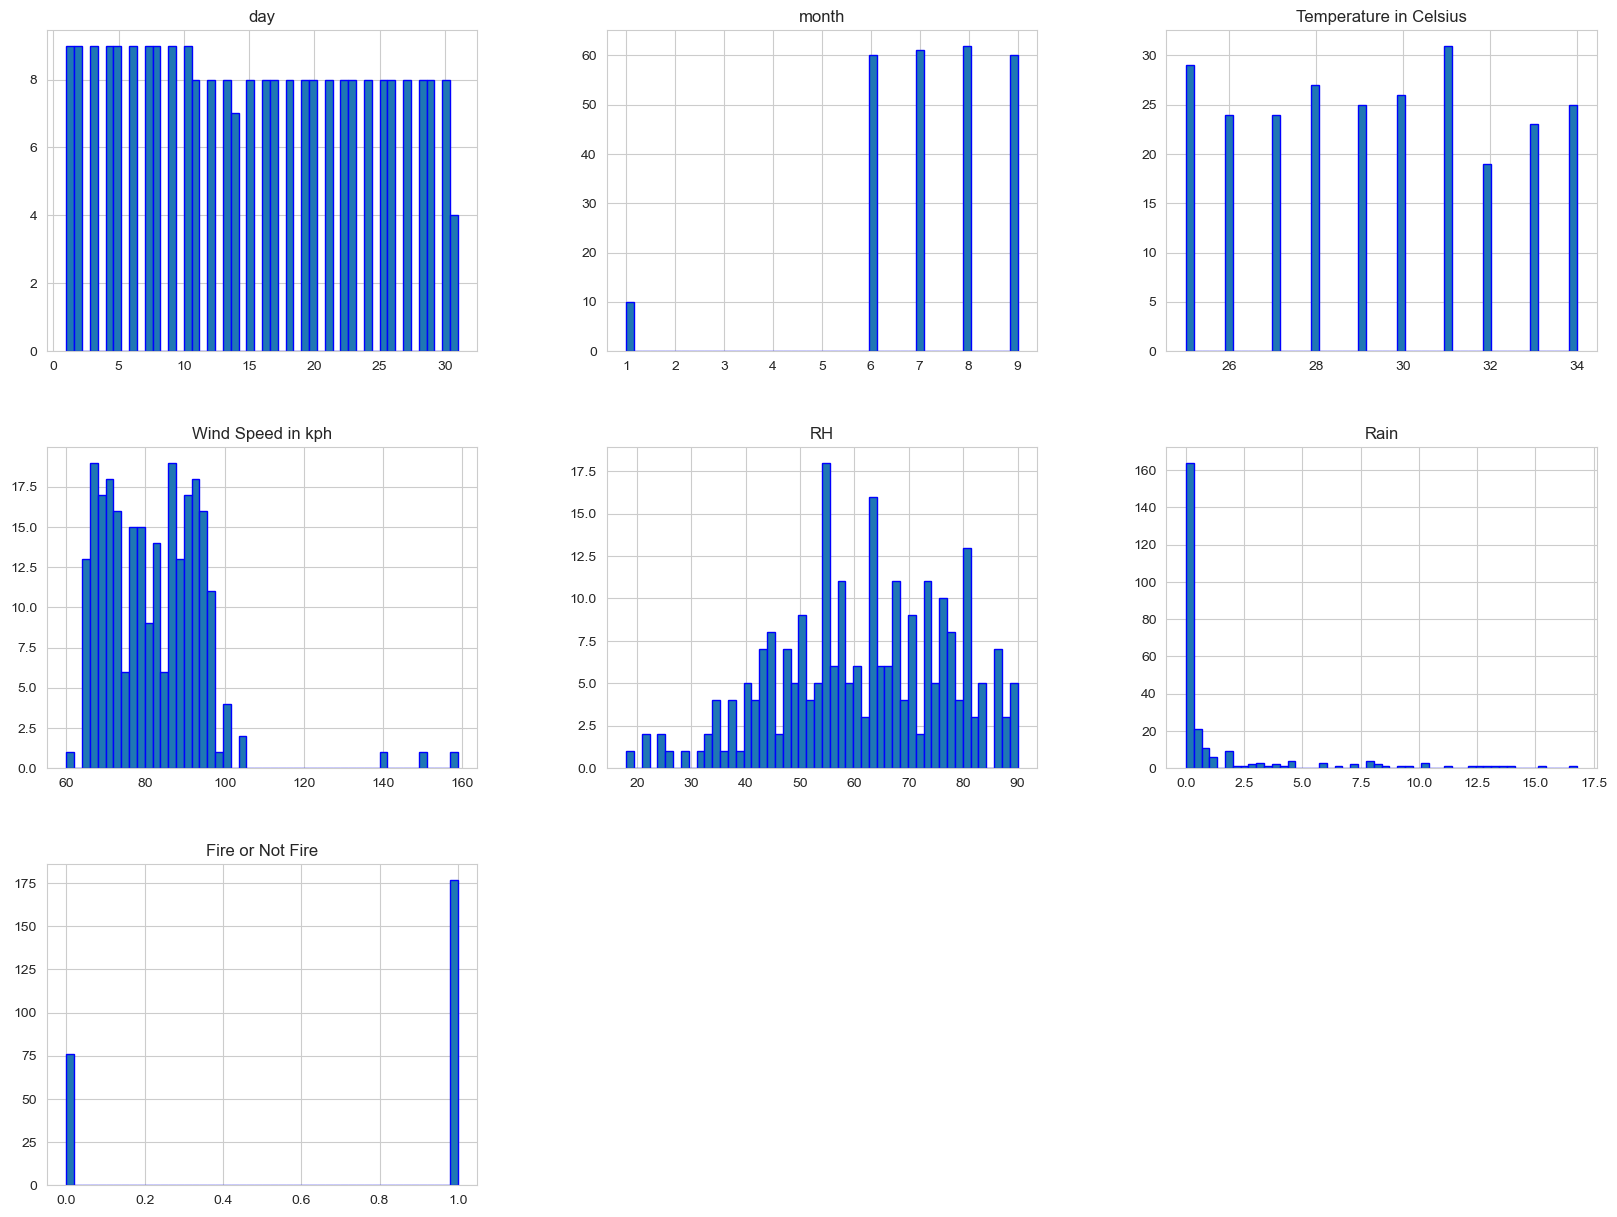

In [257]:
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()
    

In [258]:
percentage = df["Fire or Not Fire"].value_counts(normalize=True)*100
percentage
     

Fire or Not Fire
1    69.960474
0    30.039526
Name: proportion, dtype: float64

/var/folders/61/qwv3t_056nv4hlyvj0vvj6rr0000gn/T/ipykernel_61556/2612373859.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Fire or Not Fire", data=df, palette="tab10")


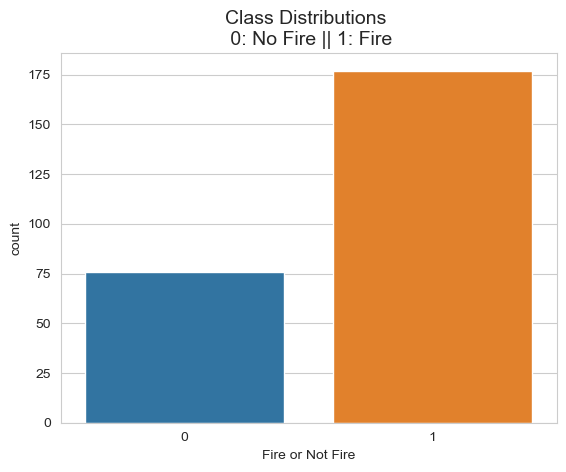

In [259]:
sns.countplot(x="Fire or Not Fire", data=df, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=14)
plt.show()



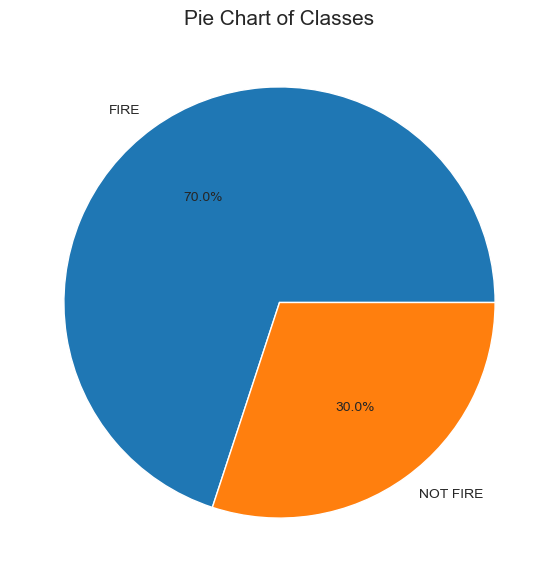

In [260]:
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

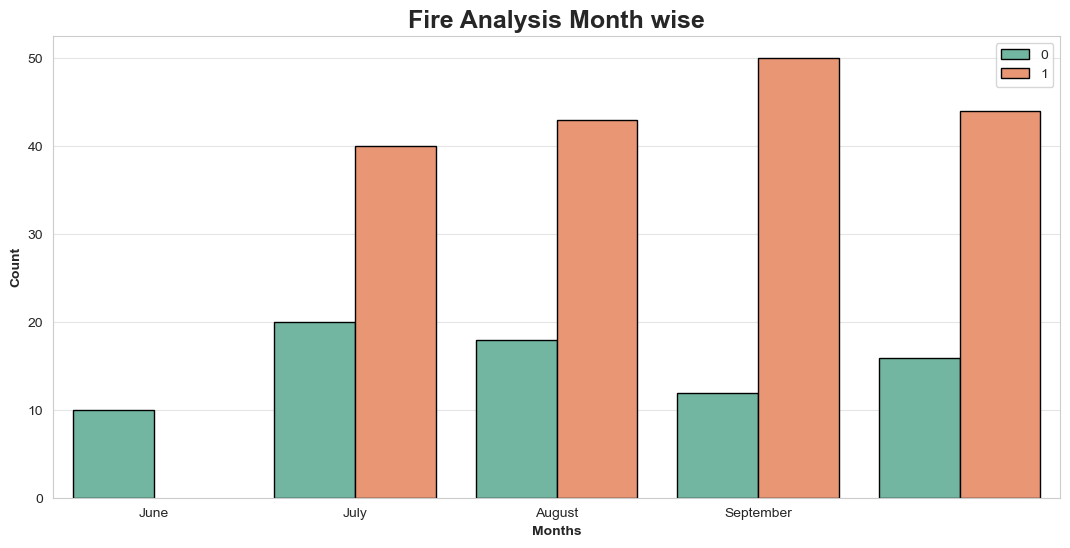

In [261]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue="Fire or Not Fire",data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [262]:
x = df.iloc[:, 0:13]
y = df["Fire or Not Fire"]

In [263]:
x.head(10)


,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire
0,1,6,30,60,68,0.00,1
1,2,6,31,79,43,0.00,0
2,3,6,29,95,43,0.00,0
3,4,6,32,83,78,0.00,0
4,5,6,28,64,48,16.80,1
5,6,6,27,67,31,0.00,0
6,7,6,26,66,58,3.63,1
7,8,6,25,66,66,0.00,1
8,9,6,34,91,69,0.00,0
9,10,6,33,70,44,0.00,0


In [264]:
y.head(10)


0    1
1    0
2    0
3    0
4    1
5    0
6    1
7    1
8    0
9    0
Name: Fire or Not Fire, dtype: int64

In [265]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)          

                  feature        VIF
0                     day   4.054522
1                   month  22.985041
2  Temperature in Celsius  57.016115
3       Wind Speed in kph  31.195730
4                      RH  16.471624
5                    Rain   1.360833
6        Fire or Not Fire   3.824623


In [279]:
# df.drop(['day','month',"Rain_replaced",	"Rain_replaced_capped",	"Rain_log",	"Rain_scaled"], axis=1)
# df.head(10)
df

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire
0,1,6,30,60,68,0.0,1
1,2,6,31,79,43,0.0,0
2,3,6,29,95,43,0.0,0
3,4,6,32,83,78,0.0,0
4,5,6,28,64,48,16.8,1
...,...,...,...,...,...,...,...
248,6,1,34,150,73,13.2,0
249,7,1,25,140,64,11.2,0
250,8,1,30,159,43,10.1,0
251,9,1,31,104,49,9.3,0


In [306]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


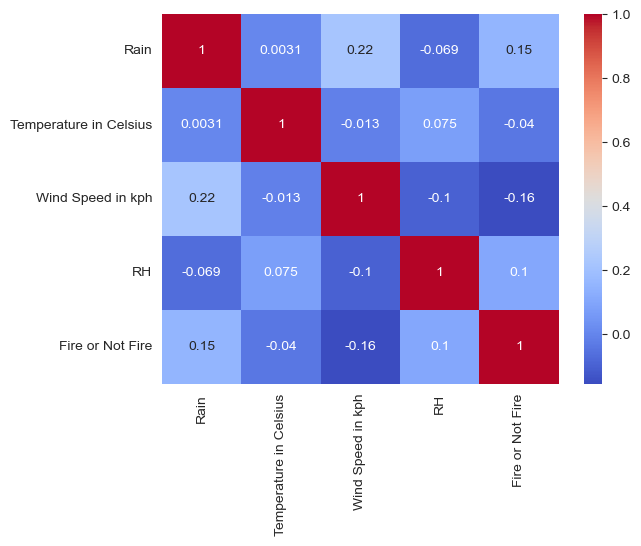

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df[['Rain', 'Temperature in Celsius', 'Wind Speed in kph', 'RH', 'Fire or Not Fire']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [314]:
df['Rain_log'] = np.log1p(df['Rain'])  # log(1 + Rain) to handle zero values
df["Rain_log"].head(50)

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     2.879198
5     0.000000
6     1.532557
7     0.000000
8     0.000000
9     0.000000
10    0.182322
11    0.000000
12    0.989541
13    1.098612
14    1.704748
15    0.000000
16    1.410987
17    0.000000
18    0.000000
19    1.568616
20    0.000000
21    0.336472
22    0.182322
23    0.000000
24    0.336472
25    0.000000
26    0.000000
27    2.105353
28    0.000000
29    0.182322
30    0.000000
31    0.095310
32    0.095310
33    0.182322
34    0.000000
35    0.000000
36    0.182322
37    0.470004
38    1.934416
39    0.000000
40    0.000000
41    0.095310
42    0.530628
43    0.000000
44    0.000000
45    0.262364
46    2.346602
47    2.646175
48    0.262364
49    0.000000
Name: Rain_log, dtype: float64

In [316]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you already have the 'Rain_log' column in your dataset
X = df[['Rain_log', 'Temperature in Celsius', 'Wind Speed in kph', 'RH']]  # Use 'Rain_log' instead of 'Rain'
y = df['Fire or Not Fire']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-Square: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"Root Mean Square Error: {rmse}")


R-Square: 0.2123552123552126
Mean Absolute Error: 0.1568627450980392
Mean Square Error: 0.1568627450980392
Root Mean Square Error: 0.3960590171906697


In [322]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to standardize
features_to_standardize = ['Temperature in Celsius', 'Wind Speed in kph', 'RH', 'Rain_log']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Check the updated DataFrame
df.head()


,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire,Rain_log
0,1,6,0.212378,-1.661800,0.415480,0.0,1,-0.623594
1,2,6,0.561286,-0.200085,-1.181064,0.0,0,-0.623594
2,3,6,-0.136529,1.030833,-1.181064,0.0,0,-0.623594
3,4,6,0.910193,0.107644,1.054098,0.0,0,-0.623594
4,5,6,-0.485436,-1.354070,-0.861755,16.8,1,3.126618


In [334]:
df.head()

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire,Rain_log
0,1,6,0.212378,-1.661800,0.415480,0.0,1,-0.623594
1,2,6,0.561286,-0.200085,-1.181064,0.0,0,-0.623594
2,3,6,-0.136529,1.030833,-1.181064,0.0,0,-0.623594
3,4,6,0.910193,0.107644,1.054098,0.0,0,-0.623594
4,5,6,-0.485436,-1.354070,-0.861755,16.8,1,3.126618


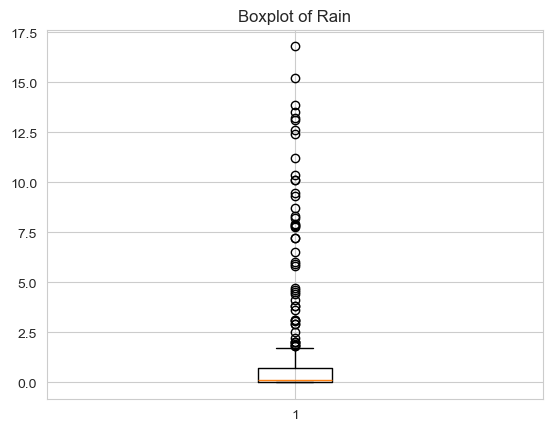

In [336]:
import matplotlib.pyplot as plt
plt.boxplot(df['Rain'])
plt.title('Boxplot of Rain')
plt.show()


In [338]:
rain_median = df['Rain'].median()
rain_95th = df['Rain'].quantile(0.95)

# Replace outliers above the 95th percentile with the median
df['Rain_replaced'] = df['Rain'].apply(lambda x: rain_median if x > rain_95th else x)

print(df[['Rain', 'Rain_replaced']].head())

   Rain  Rain_replaced
0   0.0            0.0
1   0.0            0.0
2   0.0            0.0
3   0.0            0.0
4  16.8            0.1


In [340]:

# what about scaling rain itself independently and then scaling with other features?

# Cap Rain at 95th percentile after replacing extreme values
rain_95th = df['Rain_replaced'].quantile(0.95)
df['Rain_replaced_capped'] = np.minimum(df['Rain_replaced'], rain_95th)

# Apply log transformation
df['Rain_log'] = np.log1p(df['Rain_replaced_capped']) # when data contains 0 or negative values

# Scale the modified Rain feature
rain_scaler = StandardScaler()
df['Rain_scaled'] = rain_scaler.fit_transform(df[['Rain_log']])

print(df[['Rain', 'Rain_replaced_capped', 'Rain_scaled']])

     Rain  Rain_replaced_capped  Rain_scaled
0     0.0                 0.000    -0.607697
1     0.0                 0.000    -0.607697
2     0.0                 0.000    -0.607697
3     0.0                 0.000    -0.607697
4    16.8                 0.100    -0.437022
..    ...                   ...          ...
248  13.2                 0.100    -0.437022
249  11.2                 0.100    -0.437022
250  10.1                 0.100    -0.437022
251   9.3                 5.848     2.837601
252   0.2                 0.200    -0.281207

[253 rows x 3 columns]


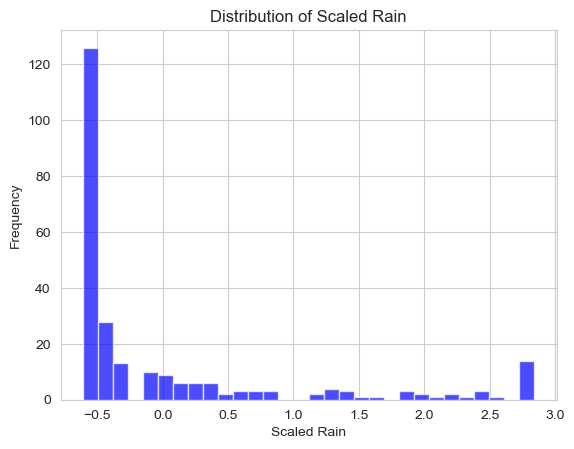

In [342]:

import matplotlib.pyplot as plt

# Histogram of scaled Rain
plt.hist(df['Rain_scaled'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Scaled Rain')
plt.xlabel('Scaled Rain')
plt.ylabel('Frequency')
plt.show()

     

In [346]:
df.head()

,day,month,Temperature in Celsius,Wind Speed in kph,RH,Rain,Fire or Not Fire,Rain_log,Rain_replaced,Rain_replaced_capped,Rain_scaled
0,1,6,0.212378,-1.661800,0.415480,0.0,1,0.00000,0.0,0.0,-0.607697
1,2,6,0.561286,-0.200085,-1.181064,0.0,0,0.00000,0.0,0.0,-0.607697
2,3,6,-0.136529,1.030833,-1.181064,0.0,0,0.00000,0.0,0.0,-0.607697
3,4,6,0.910193,0.107644,1.054098,0.0,0,0.00000,0.0,0.0,-0.607697
4,5,6,-0.485436,-1.354070,-0.861755,16.8,1,0.09531,0.1,0.1,-0.437022


In [352]:
columns_to_keep = ['Temperature in Celsius', 'Wind Speed in kph', 'RH', 'Rain_scaled', 'Fire or Not Fire']
df_scaled = df[columns_to_keep]
df_scaled.head()

,Temperature in Celsius,Wind Speed in kph,RH,Rain_scaled,Fire or Not Fire
0,0.212378,-1.661800,0.415480,-0.607697,1
1,0.561286,-0.200085,-1.181064,-0.607697,0
2,-0.136529,1.030833,-1.181064,-0.607697,0
3,0.910193,0.107644,1.054098,-0.607697,0
4,-0.485436,-1.354070,-0.861755,-0.437022,1


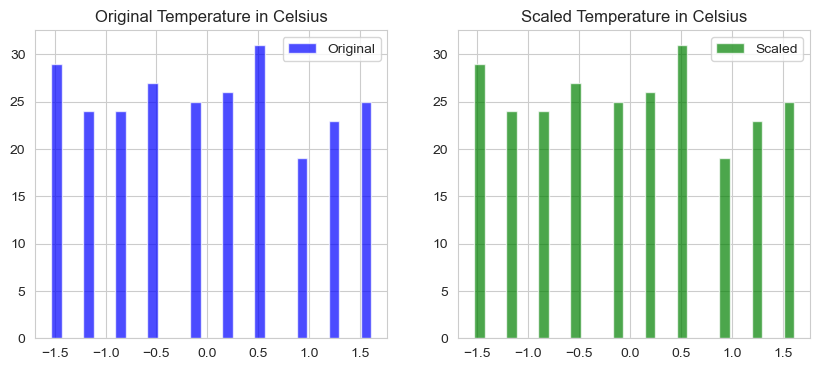

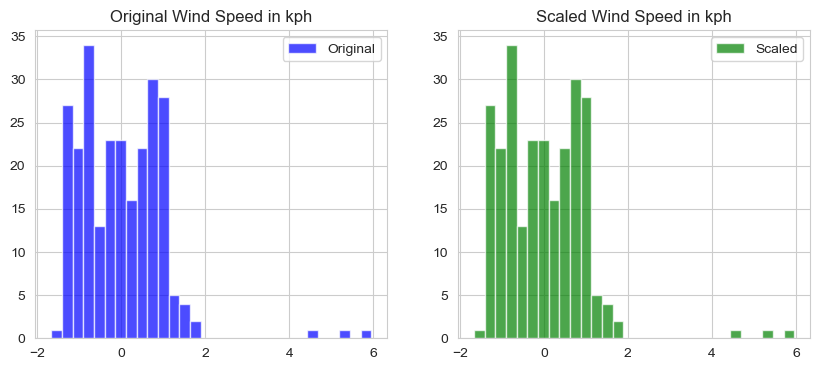

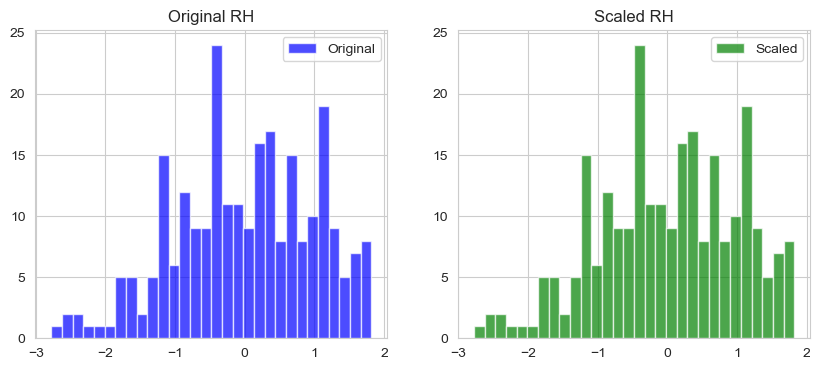

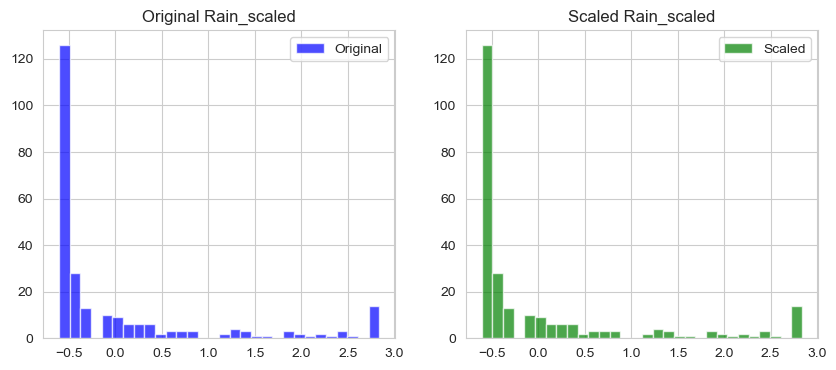

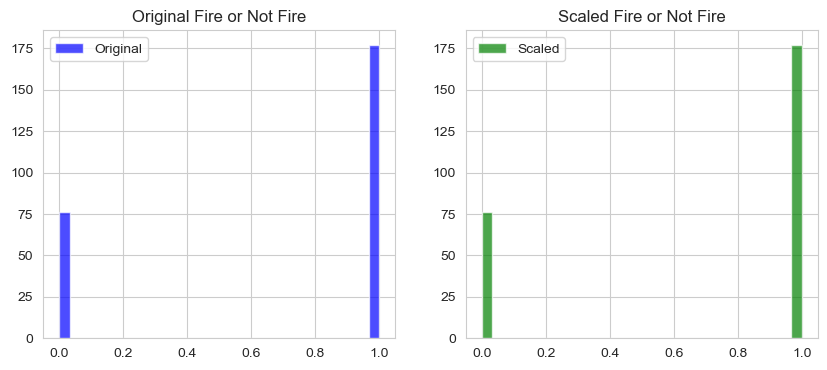

In [354]:

import matplotlib.pyplot as plt

# Visualize before and after scaling
for col in columns_to_keep:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='blue', alpha=0.7, label='Original')
    plt.title(f"Original {col}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(df_scaled[col], bins=30, color='green', alpha=0.7, label='Scaled')
    plt.title(f"Scaled {col}")
    plt.legend()

    plt.show()

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_scaled is already your scaled DataFrame
# Define features (X) and target (y)
X = df_scaled[['Temperature in Celsius', 'Wind Speed in kph', 'RH', 'Rain_scaled']]
y = df_scaled['Fire or Not Fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 66.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.14      0.19        14
           1       0.73      0.86      0.79        37

    accuracy                           0.67        51
   macro avg       0.51      0.50      0.49        51
weighted avg       0.61      0.67      0.63        51



In [358]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Print classification report for more metrics
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 86.27%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.88      0.95      0.91        37

    accuracy                           0.86        51
   macro avg       0.85      0.79      0.81        51
weighted avg       0.86      0.86      0.86        51



In [376]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")

# Print classification report for more metrics
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 90.20%

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.92      0.95      0.93        37

    accuracy                           0.90        51
   macro avg       0.88      0.87      0.87        51
weighted avg       0.90      0.90      0.90        51



In [378]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree model with the best parameters
best_decision_tree_model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model
best_decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_decision_tree = best_decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree * 100:.2f}%")

# Print classification report for more metrics
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))


Decision Tree Accuracy: 88.24%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.90      0.95      0.92        37

    accuracy                           0.88        51
   macro avg       0.87      0.83      0.85        51
weighted avg       0.88      0.88      0.88        51



In [383]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_decision_tree_model = grid_search.best_estimator_

# Make predictions
y_pred = best_decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Print classification report for more metrics
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Accuracy: 82.35%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.91      0.84      0.87        37

    accuracy                           0.82        51
   macro avg       0.78      0.81      0.79        51
weighted avg       0.84      0.82      0.83        51

